<h1 style="text-align:center"> CRIANDO GRAFOS/REDES E FUNÇÕES BÁSICAS - PARTE 2 </h1>
<p> Nesse primeiro contato iremos receber como entrada "listas de arestas", transformá-las em data frames do Pandas e depois em redes. </p>  
<p>Vamos criar redes usando o pacote NetworkX, que será a nossa referência, e depois criaremos manualmente usando Matriz,Lista de Aresta e Lista de Adjacência. Para cada uma dessas soluções iremos implementar funções básicas como: grau, existência de aresta, densidade e etc..</p>  
  
<br>  
  
<p style="font-size:10px; font-weight:bold">Material feito por Rodrigo Henrique Ramos - ramos@ifsp.edu.br</p>    

In [2]:
#Importação das bibliotecas/pacote e dos datasets
import pandas as pd #Dataframes
import networkx as nx #redes
import matplotlib.pyplot as plt #gráficos
import warnings # Para não mostrar warnings. Deixa o notebook mais limpo
warnings.filterwarnings('ignore')

#Vou criar um dicionário com todos os "inputs". Cada arquivo é uma lista de aresta, que irei transformar em dataframe
listaAresta = {}
listaAresta["rede1"] = pd.read_csv("datasets/rede1.tsv",sep="	") #tsv = Tab Separed Value, por isso o 	
listaAresta["rede2"] = pd.read_csv("datasets/rede2.tsv",sep="	")
listaAresta["rede3"] = pd.read_csv("datasets/rede3.tsv",sep="	")
listaAresta["rede4"] = pd.read_csv("datasets/rede4.tsv",sep="	")
#mostro o formato da lista de aresta referente a quarta rede. Mas só as 5 primeiras linhas
listaAresta["rede4"][:5]

,FROM,TO
0,A,B
1,A,C
2,A,D
3,A,E
4,B,C


<h1 style="text-align:center">PROGRAMANDO MANUALMENTE</h1>
<p>
    O NetworkX (NX) é uma maravilha. Cria/Amazena a rede sozinho e tem uma tonelada de métodos (funções) prontas para trabalharmos. O que é ótimo para produtividade e abstração<br>
    Mas é importante saber programar tudo isso manualmente. Inicialmente iremos armazenar a rede nas 3 formas vistas e replicar o que foi feito pelo NX: Exibir o grau de cada um e plotar a distribuição, descobrir se existe uma aresta entre X e Y
</p>
<hr>
<p>
    O importante é entender que existem diferentes Estruturas de Dados para armazenar uma Grafo e que cada estrutura necessita de algoritmos diferentes para realizar a mesma coisa. Isso abre margem para uma discussão de Complexidade de Algoritmos, porém não farei isso aqui.
</p>

<h2>Armazenando em Tabela - Funções</h2>

In [3]:
#Abaixo faço uma função que itera sobre um dataframe e retorna os valores de cada linha
#Estou usando um método do pandas chamado iterrows(), no nosso caso serve perfeitamente, porém é contra indicado para conjuntos grande: https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas 
#Todo dataframe tem uma "coluna" extra que é o indice de cada linha. Tipo uma chave primária em tabelas do banco de dados.
#Veja abaixo o formato do dataframe como o indice aparece como uma coluna sem nome
listaAresta["rede1"]

,FROM,TO
0,A,B
1,B,C
2,C,D
3,D,E


In [4]:
#Recebe uma Lista de Aresta armazenada em um data frame e retornar uma matriz e uma lookUpTable
def deListaArestaParaMatriz(pandasListaAres):
    # A lista de aresta tem duas colunas FROM e TO. Vou criar uma lista para cada uma
    listaFrom =[]
    listaTo =[]
    # separo o retorno de iterrows() em indice e o resto da linha e acesso cada valor pelo nome da coluna
    for index, row in pandasListaAres.iterrows():
        listaFrom.append(row['FROM'])
        listaTo.append(row['TO'])
    # Para criar uma tabela eu preciso colocar todos os vertices nas linhas e nas colunas
    # Tem vertice que só aparece em FROM (ex: A) e vertice que só aparece em TO (ex:E)
    # Preciso juntar os elementos das duas listas sem colocar elementos repetidos
    # Para isso usarei o SET, que é uma lista sem repetição
    todosVerticesSemRepeticao = set(listaFrom + listaTo)
    # Agora transformo o SET em LIST para pode acessar os indices :) e ordeno, pq o SET bagunça a ordem original
    todosVerticesSemRepeticao = sorted(list(todosVerticesSemRepeticao))
    #print(todosVerticesSemRepeticao) #Descomente para ver como fica
    
    #Agora que sei qual são todos os vertices, crio uma matriz to tamanho desse conjunto
    matriz=[]
    for i in range(len(todosVerticesSemRepeticao)):
        linha=[]
        for j in range(len(todosVerticesSemRepeticao)):
            linha.append(0)
        matriz.append(linha) 
        
    #até agora só tenho uma matriz cheia de zeros
    #return matriz #Descomente para ver
    
    #LookUpTable "transforma" o nome do vertice em um indice da matriz
    nomeToIndice=lookUpTable(todosVerticesSemRepeticao)
        
    #Finalmente, percorro simultaneamente listaFrom e listaTo e, com o uso da lookUp table, marco 1 na matriz qdo tiver aresta
    for i in range(len(listaFrom)):
        matriz[nomeToIndice[listaFrom[i]]][nomeToIndice[listaTo[i]]]=1    
        matriz[nomeToIndice[listaTo[i]]][nomeToIndice[listaFrom[i]]]=1 
    
    #A Matriz e a LookUp table tem que trabalhar em conjunto. Uma não funciona sem a outra. 
    #Por isso preciso retornar as duas. Pra n ter q fazer um objeto, retorno uma lista.
    retorno = [matriz,nomeToIndice]
    return retorno
        

In [5]:
#A matriz é acessada por indice, não por nome/chave. A lista de aresta só tem o nome dos vertices. Então vou criar uma
#LookUp Table, que é um dicionário, com o nome do vertice como chave e o indice dele na tabela como valor
#LookUpTable "transforma" o nome do vertice em um indice da matriz
def lookUpTable(listaOrdenadaDeVertices):
    lookUpTable = {}
    indice=0
    for nomeVertice in listaOrdenadaDeVertices:
        lookUpTable[nomeVertice]= indice
        indice+=1
    return lookUpTable

In [6]:
def imprimeMatriz(matriz):
    for linha in matriz:
        print(linha)

In [7]:
#Essa função poderia ter diversas saídas. Vou fazer igual o NX e retornar uma lista de tuplas
def getGrauPorVerticeMatriz(matriz,lookUp):
    #A chave de lookUp é o nome do vertice, e o valor dele o indice da matriz
    retorno=[]
    for key in lookUp:
        #Pra pegar os vizinhos, só precisa percorrer as linhas ou colunas
        linha = matriz[lookUp[key]]
        #Linha vai ter 0 e vai ter 1. Me interessa qdo 1s ela tem
        cont = 0
        for valor in linha:
            if valor > 0:
                cont+=1
        tupla = (key,cont)
        retorno.append(tupla)
    return retorno

In [8]:
#recebe uma lista de graus com tuplas (nomeVertice,grau) e retorna um scatterPlot
def graficoGrauMatriz(listaDeGraus):
    eixoX=[]
    eixoY=[]
    for item in listaDeGraus:
        eixoX.append(item[0])
        eixoY.append(item[1])
    plt.scatter(eixoX,eixoY) 
    plt.show()

In [9]:
#É parecido com a função de grau, mas aqui vou associar o vertice com os nome de seus vizinhos
def getVizinhosMatriz(matriz,lookUp):
    #A chave de lookUp é o nome do vertice, e o valor dele o indice da matriz
    retorno=[]
    for key in lookUp:
        #Pra pegar os vizinhos, só precisa percorrer as linhas ou colunas
        linha = matriz[lookUp[key]]
        #Linha vai ter 0 e vai ter 1. Me interessa qdo 1s ela tem
        vizinhos = []
        indice = 0
        for valor in linha:
            if valor > 0:
                #Qdo o valor for maior que um, pego o indice que estou e vejo em looUp qual chave tem esse valor 
                for chave,value in lookUp.items():
                    if value == indice:
                        vizinhos.append(chave)
            indice+=1
        tupla = (key,vizinhos)
        retorno.append(tupla)
    return retorno

In [10]:
#retorna TRUE se v1 tiver aresta para v2
def temArestaMatriz(matriz,lookUp,v1,v2):
    #Vejam como que usando matriz e lookUpTable fica facil verificar aresta
    if matriz[lookUp[v1]][lookUp[v2]]==1:
        return True
    else:
        return False
    
    #Na verdade, eu poderia retornar só matriz[lookUp[v1]][lookUp[v2]], ai a função teria uma linha só

<h2>Armazenando em Tabela - Main</h2>




---- REDE1 ---------------------------
[0, 1, 0, 0, 0]
[1, 0, 1, 0, 0]
[0, 1, 0, 1, 0]
[0, 0, 1, 0, 1]
[0, 0, 0, 1, 0]

Graus:  [('A', 1), ('B', 2), ('C', 2), ('D', 2), ('E', 1)]


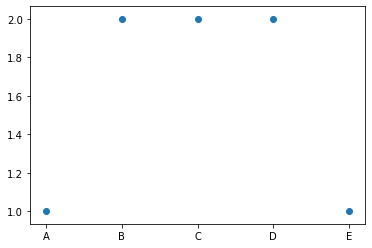


 Vizinhos de cada nó
[('A', ['B']), ('B', ['A', 'C']), ('C', ['B', 'D']), ('D', ['C', 'E']), ('E', ['D'])]

 Verificação de aresta A-B e A-D
True
False



---- REDE2 ---------------------------
[0, 1, 1, 1, 0, 0, 0, 0, 0]
[1, 0, 1, 1, 0, 0, 0, 0, 0]
[1, 1, 0, 1, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 1, 0, 1]
[0, 0, 0, 0, 0, 1, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 1]
[0, 0, 0, 0, 0, 1, 0, 1, 0]

Graus:  [('A', 3), ('B', 3), ('C', 3), ('D', 4), ('E', 2), ('F', 3), ('G', 2), ('H', 2), ('I', 2)]


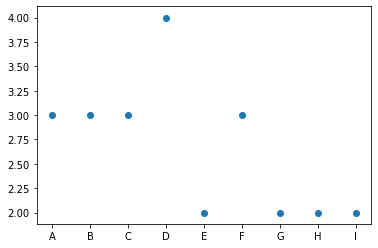


 Vizinhos de cada nó
[('A', ['B', 'C', 'D']), ('B', ['A', 'C', 'D']), ('C', ['A', 'B', 'D']), ('D', ['A', 'B', 'C', 'E']), ('E', ['D', 'F']), ('F', ['E', 'G', 'I']), ('G', ['F', 'H']), ('H', ['G', 'I']), ('I', ['F', 'H'])]

 Verificação de aresta A-B e A-D
True
True



---- REDE3 ---------------------------
[0, 1, 1, 0, 0, 0]
[1, 0, 1, 0, 0, 0]
[1, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 1]
[0, 0, 0, 1, 0, 1]
[0, 0, 0, 1, 1, 0]

Graus:  [('A', 2), ('B', 2), ('C', 2), ('D', 2), ('E', 2), ('F', 2)]


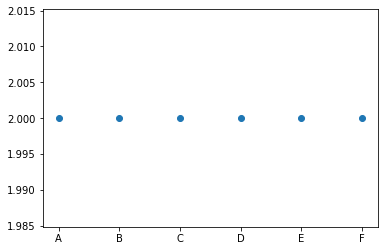


 Vizinhos de cada nó
[('A', ['B', 'C']), ('B', ['A', 'C']), ('C', ['A', 'B']), ('D', ['E', 'F']), ('E', ['D', 'F']), ('F', ['D', 'E'])]

 Verificação de aresta A-B e A-D
True
False



---- REDE4 ---------------------------
[0, 1, 1, 1, 1]
[1, 0, 1, 1, 1]
[1, 1, 0, 1, 1]
[1, 1, 1, 0, 1]
[1, 1, 1, 1, 0]

Graus:  [('A', 4), ('B', 4), ('C', 4), ('D', 4), ('E', 4)]


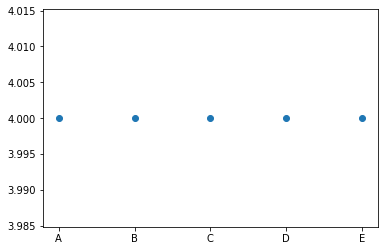


 Vizinhos de cada nó
[('A', ['B', 'C', 'D', 'E']), ('B', ['A', 'C', 'D', 'E']), ('C', ['A', 'B', 'D', 'E']), ('D', ['A', 'B', 'C', 'E']), ('E', ['A', 'B', 'C', 'D'])]

 Verificação de aresta A-B e A-D
True
True


In [13]:
#Para Cada lista de aresta (pandas dataframe), chamo a função que cria uma Tabela de Adjacência 
#Armazena todas as matrizes em um dicionário
listaRedesMatriz = {}
for key in listaAresta:
    #listaRedesMatriz[key] é uma lista com: [0] matriz, [1] lookupTable
    listaRedesMatriz[key]=deListaArestaParaMatriz(listaAresta[key])
    
    print('\n\n\n----',key.upper(),'---------------------------')    
    imprimeMatriz(listaRedesMatriz[key][0])    
    
    graus = getGrauPorVerticeMatriz(listaRedesMatriz[key][0],listaRedesMatriz[key][1])
    print('\nGraus: ',graus)
    
    graficoGrauMatriz(graus)
    
    print("\n Vizinhos de cada nó")
    vizinhos = getVizinhosMatriz(listaRedesMatriz[key][0],listaRedesMatriz[key][1])
    print(vizinhos)
    
    print("\n Verificação de aresta A-B e A-D")
    temAresta=temArestaMatriz(listaRedesMatriz[key][0],listaRedesMatriz[key][1],"A","B")
    print(temAresta)
    temAresta=temArestaMatriz(listaRedesMatriz[key][0],listaRedesMatriz[key][1],"A","D")
    print(temAresta)

<h2>Armazenando em Lista de Adjacencia - Funções</h2>

In [11]:
#Recebe uma Lista de Aresta armazenada em um data frame e retorna um lista de adjacência como dicionario
def deListaArestaParaListaAdjacencia(pandasListaAres):
    # A lista de aresta tem duas colunas FROM e TO. Vou criar uma lista para cada uma
    listaFrom =[]
    listaTo =[]
    # separo o retorno de iterrows() em indice e o resto da linha e acesso cada valor pelo nome da coluna
    for index, row in pandasListaAres.iterrows():
        listaFrom.append(row['FROM'])
        listaTo.append(row['TO'])     
    
    todosVerticesSemRepeticao = set(listaFrom + listaTo)
    # Agora transformo o SET em LIST para pode acessar os indices :) e ordeno, pq o SET bagunça a ordem original
    todosVerticesSemRepeticao = sorted(list(todosVerticesSemRepeticao))
    
    #Cada vertice será uma chave no dic e seus vizinhos serão o valor (lista)
    listaAdjacencia = {}
    for v in todosVerticesSemRepeticao:
        #O vertice pode aparecer na lista FROM e/ou TO. Sempre que ele aparecer tenho que pegar o vertice do outro "lado"
        #Procuro nas duas listas o vertice atual, qdo acho pego o indice e busco o correspondente na outra lista e guardo como vizinhos
        vizinhos = []
        for indice in range(0,len(listaFrom)):            
            if listaFrom[indice]==v:
                vizinhos.append(listaTo[indice])
            if listaTo[indice]==v:
                vizinhos.append(listaFrom[indice])
        listaAdjacencia[v] = vizinhos
    
    return listaAdjacencia
        

In [12]:
def getGrauPorVerticeAdjacencia(listaAdjacencia):
    #para manter o padrão vou retornar um lista de tupla
    retorno = []
    for v in listaAdjacencia:
        retorno.append((v,len(listaAdjacencia[v])))
        
    return retorno    

In [13]:
def getVizinhosAdjacencia(listaAdjacencia):
    #A lista de adjacencia já é uma lista de vizinhos, então fica bem fácil esse
    #Vou manter o formado da NX e retornar lista de tupla
    retorno = []
    for v in listaAdjacencia:
        retorno.append((v,listaAdjacencia[v]))
        
    return retorno  

In [14]:
def temArestaAdjacencia(listaAdjacencia,v1,v2):
    #verfica se v2 existe nos vizinhos de v1
    return (v2 in listaAdjacencia[v1])     

<h2>Armazenando em Lista de Adjacencia - Main</h2>

In [15]:
#Para Cada lista de aresta (pandas dataframe), chamo a função que cria uma Lista de Adjacência 
#Armazena todas as listas em um dicionário
listaRedesAdjacencia = {}
for key in listaAresta:
    
    listaRedesAdjacencia[key]=deListaArestaParaListaAdjacencia(listaAresta[key])
    
    print('\n\n\n----',key.upper(),'---------------------------')   
    #Imprimi 'normal'
    #print(listaRedesAdjacencia[key])
    #Pra imprimir bonito
    [print(x+'->',listaRedesAdjacencia[key][x]) for x in listaRedesAdjacencia[key]]
    
    
    graus = getGrauPorVerticeAdjacencia(listaRedesAdjacencia[key])
    print('\nGraus: ',graus)  
   
    print("\n Vizinhos de cada nó")
    vizinhos = getVizinhosAdjacencia(listaRedesAdjacencia[key])
    print(vizinhos)
    
    print("\n Verificação de aresta A-B e A-D")
    temAresta=temArestaAdjacencia(listaRedesAdjacencia[key],"A","B")
    print(temAresta)
    temAresta=temArestaAdjacencia(listaRedesAdjacencia[key],"A","D")
    print(temAresta)




---- REDE1 ---------------------------
A-> ['B']
B-> ['A', 'C']
C-> ['B', 'D']
D-> ['C', 'E']
E-> ['D']

Graus:  [('A', 1), ('B', 2), ('C', 2), ('D', 2), ('E', 1)]

 Vizinhos de cada nó
[('A', ['B']), ('B', ['A', 'C']), ('C', ['B', 'D']), ('D', ['C', 'E']), ('E', ['D'])]

 Verificação de aresta A-B e A-D
True
False



---- REDE2 ---------------------------
A-> ['B', 'C', 'D']
B-> ['A', 'C', 'D']
C-> ['A', 'B', 'D']
D-> ['A', 'B', 'C', 'E']
E-> ['D', 'F']
F-> ['E', 'G', 'I']
G-> ['F', 'H']
H-> ['G', 'I']
I-> ['H', 'F']

Graus:  [('A', 3), ('B', 3), ('C', 3), ('D', 4), ('E', 2), ('F', 3), ('G', 2), ('H', 2), ('I', 2)]

 Vizinhos de cada nó
[('A', ['B', 'C', 'D']), ('B', ['A', 'C', 'D']), ('C', ['A', 'B', 'D']), ('D', ['A', 'B', 'C', 'E']), ('E', ['D', 'F']), ('F', ['E', 'G', 'I']), ('G', ['F', 'H']), ('H', ['G', 'I']), ('I', ['H', 'F'])]

 Verificação de aresta A-B e A-D
True
True



---- REDE3 ---------------------------
A-> ['B', 'C']
B-> ['A', 'C']
C-> ['B', 'A']
D-> ['E', 'F']
E->

<h2>Armazenando em Lista de Arestas - Funções</h2>

In [16]:
def deListaArestaParaListaAresta(pandasListaAres):
    #O processo aqui vai ser percorrer o dataframe e colocar cada linha em uma lista de tupla
    listaAresta=[]
    for index, row in pandasListaAres.iterrows():
        v1 = row['FROM']
        v2 = row['TO']
        aresta=(v1,v2)
        listaAresta.append(aresta)
        
    return listaAresta
    

In [17]:
def getGrauPorVerticeAresta(listaArestas):
    retorno = []
    listaFrom =[]
    listaTo =[]
    
    #A primeira coisa é encontrar todos os vertices que existem. Tenho que 'olhar' os dois lados da aresta    
    for aresta in listaArestas:
        listaFrom.append(aresta[0])
        listaTo.append(aresta[1])
    
    semRepeticao = set(listaFrom+listaTo)
    semRepeticao = sorted(semRepeticao)
    
    #Verifica qta vezes cada vertice aparece na lista de aresta    
    for v in semRepeticao:
        qtdeAresta = 0
        for aresta in listaArestas:
            if aresta[0] == v or aresta[1] == v:
                qtdeAresta+=1
        retorno.append((v,qtdeAresta))
            
    
    return retorno

In [18]:
def getVizinhosAresta(listaArestas):
    retorno = []
    listaFrom =[]
    listaTo =[]
    
    #A primeira coisa é encontrar todos os vertices que existem. Tenho que 'olhar' os dois lados da aresta    
    for aresta in listaArestas:
        listaFrom.append(aresta[0])
        listaTo.append(aresta[1])
    
    semRepeticao = set(listaFrom+listaTo)
    semRepeticao = sorted(semRepeticao)
    
    #Para cada vez que o vertice aparece na lista de aresta, pego o vertice 'do outro lado'    
    for v in semRepeticao:
        vizinhos = []
        for aresta in listaArestas:
            if aresta[0] == v: 
                vizinhos.append(aresta[1])
            if aresta[1] == v: 
                vizinhos.append(aresta[0])
        retorno.append((v,vizinhos))
            
    
    return retorno

In [19]:
def temArestaListaAresta(listaArestas,v1,v2):
    #Cada item na lista é uma resta, só precisa encontrar. Lembrando que estamos em um grafo não direcionado. Logo tem que olhar dos dois lados
    for aresta in listaArestas:
        #O v1 pode estar em qualquer um dos dados da aresta
        if (v1 in aresta and v2 in aresta):
            return True
    
    return False

<h2>Armazenando em Lista de Arestas - Main</h2>

In [21]:
#Para Cada lista de aresta (pandas dataframe), chamo a função que cria uma Lista de Aresta, porém sem ser no dataframe 
#Armazena todas as listas em um dicionário
listaRedesArestas = {}
for key in listaAresta:
    
    listaRedesArestas[key]=deListaArestaParaListaAresta(listaAresta[key])
    
    print('\n\n\n----',key.upper(),'---------------------------')   
    #Imprimi 'normal'
    print(listaRedesArestas[key])
    #Pra imprimir bonito
    #[print(x+'->',listaRedesArestas[key][x]) for x in listaRedesArestas[key]]    
    
    graus = getGrauPorVerticeAresta(listaRedesArestas[key])
    print('\nGraus: ',graus)  
   
    print("\nVizinhos de cada nó")
    vizinhos = getVizinhosAresta(listaRedesArestas[key])
    print(vizinhos)
    
    print("\nVerificação de aresta A-B e A-D")
    temAresta=temArestaListaAresta(listaRedesArestas[key],"A","B")
    print(temAresta)
    temAresta=temArestaListaAresta(listaRedesArestas[key],"A","D")
    print(temAresta)




---- REDE1 ---------------------------
[('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E')]

Graus:  [('A', 1), ('B', 2), ('C', 2), ('D', 2), ('E', 1)]

Vizinhos de cada nó
[('A', ['B']), ('B', ['A', 'C']), ('C', ['B', 'D']), ('D', ['C', 'E']), ('E', ['D'])]

Verificação de aresta A-B e A-D
True
False



---- REDE2 ---------------------------
[('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D'), ('C', 'D'), ('D', 'E'), ('E', 'F'), ('F', 'G'), ('G', 'H'), ('H', 'I'), ('F', 'I')]

Graus:  [('A', 3), ('B', 3), ('C', 3), ('D', 4), ('E', 2), ('F', 3), ('G', 2), ('H', 2), ('I', 2)]

Vizinhos de cada nó
[('A', ['B', 'C', 'D']), ('B', ['A', 'C', 'D']), ('C', ['A', 'B', 'D']), ('D', ['A', 'B', 'C', 'E']), ('E', ['D', 'F']), ('F', ['E', 'G', 'I']), ('G', ['F', 'H']), ('H', ['G', 'I']), ('I', ['H', 'F'])]

Verificação de aresta A-B e A-D
True
True



---- REDE3 ---------------------------
[('A', 'B'), ('B', 'C'), ('C', 'A'), ('D', 'E'), ('E', 'F'), ('F', 'D')]

Graus:  [('A', 2), ('B', 2), 